In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.layers import *
from keras import models
model = models.Sequential()
from keras.preprocessing import image

In [ ]:
from tensorflow.keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet',
include_top=False,
input_shape=(256, 256, 3))

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory("/content/drive/MyDrive/Thesis Data/train",
                                            image_size=(256,256), batch_size=32)

Found 4922 files belonging to 2 classes.


In [ ]:
val_dataset = image_dataset_from_directory("/content/drive/MyDrive/Thesis Data/val",
                                             image_size=(256, 256),batch_size=32)

Found 1406 files belonging to 2 classes.


In [ ]:
test_dataset = image_dataset_from_directory("/content/drive/MyDrive/Thesis Data/test",
                                             image_size=(256,256))

Found 705 files belonging to 2 classes.


In [ ]:

history = model.fit(
train_dataset,validation_data = val_dataset, epochs=10)

Epoch 1/10
154/154 [==============================] - 507s 3s/step - loss: 2.0036 - accuracy: 0.5488 - val_loss: 15200.4424 - val_accuracy: 0.5420
Epoch 2/10
154/154 [==============================] - 70s 449ms/step - loss: 0.9002 - accuracy: 0.5516 - val_loss: 292.8474 - val_accuracy: 0.4815
Epoch 3/10
154/154 [==============================] - 71s 456ms/step - loss: 0.7434 - accuracy: 0.5794 - val_loss: 8.6010 - val_accuracy: 0.5420
Epoch 4/10
154/154 [==============================] - 71s 457ms/step - loss: 0.6741 - accuracy: 0.6428 - val_loss: 2.3491 - val_accuracy: 0.6067
Epoch 5/10
154/154 [==============================] - 71s 457ms/step - loss: 0.5713 - accuracy: 0.7166 - val_loss: 0.4854 - val_accuracy: 0.7980
Epoch 6/10
154/154 [==============================] - 71s 459ms/step - loss: 0.1138 - accuracy: 0.9638 - val_loss: 0.1624 - val_accuracy: 0.9637
Epoch 7/10
154/154 [==============================] - 72s 463ms/step - loss: 0.0794 - accuracy: 0.9923 - val_loss: 0.1356 - va

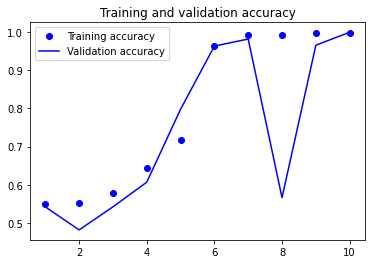

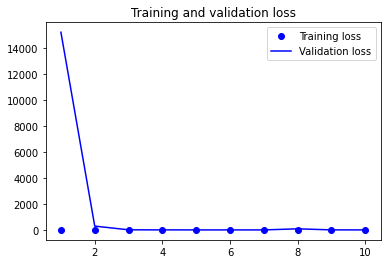

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_dataset)

23/23 [==============================] - 96s 3s/step - loss: 1.0228e-07 - accuracy: 1.0000


[1.0228189495364859e-07, 1.0]